In [2]:
pip install z3-solver

Note: you may need to restart the kernel to use updated packages.


In [3]:
from z3 import *
import math
import time
import itertools
import io
from datetime import datetime
import numpy as np


In [20]:



def pack_rectangles(max_width,number_rectangles, width,height,rotation,symmetry):

    #start_time = time.time()
   
    s = Optimize()
    
   
    
    
    
    circuits_x = [Int(f"x_{i}") for i in range(number_rectangles)]
    circuits_y = [Int(f"y_{i}") for i in range(number_rectangles)]
    
    
    
    #s = Solver()
    s.set("timeout", 300 * 1000)
    #x = [Int('x%s' % i) for i in range(number_rectangles)]
    #y = [Int('y%s' % i) for i in range(number_rectangles)]

    R = [Bool('R%s' % i) for i in range(number_rectangles)]

    
    


    
    
    #computing upperbound
    xx=circuits_x.copy()
    yy=circuits_y.copy()  
    #xx=x.copy()
    #yy=y.copy()  
    W =max_width
    upperbound = H_UB (W, dimension_rectangle,xx,yy,False)
    
    Rectangle_height = Int('Rectangle_height')
    s.add(Rectangle_height <= upperbound)
    s.add(Rectangle_height >= lowerbound)
    
    
    
    dx=width
    dy=height
    
    
    # constraint for non overlapping
    for i in range(number_rectangles):
        for j in range(number_rectangles):
            if i != j:
                s.add(Or(
                         And(circuits_x[i] + height[i] <= circuits_x[j], R[i]),
                         And(circuits_x[i] + width[i] <= circuits_x[j], Not(R[i])),
                         And(circuits_x[j] + height[j] <=circuits_x[i], R[j]),
                         And(circuits_x[j] + width[j] <= circuits_x[i], Not(R[j])),
                         And(circuits_y[i] + width[i] <= circuits_y[j], R[i]),
                         And(circuits_y[i] + height[i] <= circuits_y[j], Not(R[i])),
                         And(circuits_y[j] + width[j] <= circuits_y[i], R[j]),     
                         And(circuits_y[j] + height[j] <= circuits_y[i], Not(R[j])),


                         ))

  
    #respecting the maximum boundaries on the x and y axsis 
    s.add([circuits_x[i] >= 0 for i in range(number_rectangles)])
    s.add([Or(Not(R[i]), circuits_x[i] + height[i] - 1 < max_width) for i in range(number_rectangles)])
    s.add([Or(R[i], circuits_x[i] + width[i] - 1 < max_width) for i in range(number_rectangles)])
    
    s.add([circuits_y[i] >= 0 for i in range(number_rectangles)])
    s.add([Or(R[i], circuits_y[i] + height[i] - 1 < Rectangle_height) for i in range(number_rectangles)])
    s.add([Or(Not(R[i]), circuits_y[i] + width[i] - 1 < Rectangle_height) for i in range(number_rectangles)])

    '''

      

    circuits_w=width
    circuits_h=height
        
        
    non_overlap = [Or( 
                    circuits_x[i] + circuits_w[i] <= circuits_x[j],
                    circuits_x[i] >= circuits_x[j] + circuits_w[j],
                    circuits_y[i] + circuits_h[i] <= circuits_y[j],
                    circuits_y[i] >= circuits_y[j] + circuits_h[j]
                    ) for i in range(number_rectangles-1) for j in range(i+1, number_rectangles)]
    
    in_limits = [And(circuits_x[i] + circuits_w[i] <= max_width,
                circuits_y[i] + circuits_h[i] <= Rectangle_height, 
                circuits_x[i] >= 0, 
                circuits_y[i] >= 0) for i in range(number_rectangles)]
                
           
    s.add(non_overlap + in_limits)
    
    
    '''
    
     '''
    if symmetry:
        # symmetry breaking constraints
        for i in range(number_rectangles):
            for j in range(number_rectangles):
                if i != j:


                    #symmetry breaking constraint         
                    s.add(Implies(circuits_w[i] + circuits_w[j] > W,And(circuits_x[i]+circuits_w[i]>circuits_x[j],circuits_x[j]+circuits_w[j]>circuits_x[i])))
                    s.add(Implies(circuits_h[i] + circuits_h[j] > H,And(circuits_y[i]+circuits_h[i]>circuits_y[j],circuits_y[j]+circuits_h[j]>circuits_y[i])))

    '''





   
   


       
        
        
        
   # H = lowerbound    
        

    

    
    

    
    
    
    
    
    

        
        
        
    

    
    
    
    
    
    
    
    
  


                
    
    
    
    
    s.minimize(Rectangle_height)

    if s.check() == sat:
        print('Solved')
        print(s.statistics().time)
    else:
        print('UNSAT')
        return -1,-1,-1,-1,301

    return s,circuits_x,circuits_y, R,s.statistics().time
    #return s,x,y,R,s.statistics().time


def H_UB( W, rectangles,x,y, plot=False):
    placer_x = 0
    occupied_height= [0]*W
    
    q=0
    for r in rectangles:
        occupied_height_copy = occupied_height.copy()
        placer_x = np.argmin(occupied_height_copy)
        placer_y = min(occupied_height_copy)
        while ((placer_x + r[0])>W or any([x > placer_y for x in occupied_height[placer_x:(placer_x + r[0])]])):
            occupied_height_copy.remove(placer_y)
            placer_x = np.argmin(occupied_height_copy)
            placer_y = min(occupied_height_copy)

       
        x[q] = placer_x
        y[q] = placer_y
        
        for i in range(placer_x, placer_x + r[0]):
            occupied_height[i] = placer_y + r[1]
        
        q=q+1
        placer_x += r[0]
        
    
    if plot:
        plot_rectangles(rectangles, title = self.name)
        
    list_a=[]
    Z=0
    for r in rectangles:
        list_a.append(r[1]+y[Z])
        Z=Z+1
        
    return max(list_a)

for i in range(1,10):
    file_name = "./../instances/ins-" + str(i) + ".txt"
    file = open(file_name)
    max_width = int(file.readline())
    number_rectangles = int(file.readline())

    width = []
    height = []

    for line in file:
        width_height = line.split()
        width_height = [int(x) for x in width_height]
        width.append(width_height[0])
        height.append(width_height[1])

    dimension_rectangle = []
    for j, k in zip(width, height):
        dimension_rectangle.append([j, k])

    area = sum([b[0] * b[1] for b in dimension_rectangle])
    lowerbound = area / max_width
    circuits_w,circuits_h=width,height
    

    start = time.time()
    s, px, py, R, time_x = pack_rectangles(max_width,number_rectangles,width,height,True, False)
    end = time.time()
    
    final_time = end - start

    if s != -1:
        m = s.model()
        file_out = "./../out_test - Copy/out-" + str(i) + ".txt"
        file_out_time_1 = "./../time_test - Copy/time-" + str(i) + ".txt"

        with open(file_out, 'w') as file:

            result = sorted([(d, m[d]) for d in m], key=lambda x: str(x[0]))
            file.write(str(max_width) + ' ' + str(lowerbound) + "\n")
            file.write(str(number_rectangles)+'\n')
            for k in range(1,number_rectangles+1):
                if (m.evaluate(R[k-1])):
                    file.write(str(height[k-1]) + ' ' + str(width[k-1]) + ' ' + str(m.evaluate(px[k-1])) + ' ' + str(m.evaluate(py[k-1])) + "\n")
                else:
                     file.write(str(width[k-1]) + ' ' + str(height[k-1]) + ' ' + str(m.evaluate(px[k-1])) + ' ' + str(m.evaluate(py[k-1])) + "\n")

        with open(file_out_time_1, 'w') as file:
            file.write(str(final_time))
             
    else:
        
        file_out_time_1 = "./../time_test_UN - Copy/time-" + str(i) + ".txt"
        
        with open(file_out_time_1, 'w') as file:
            
            file.write(str(final_time))
    
         

Solved
0.005
Solved
0.009
Solved
0.008
Solved
0.009
Solved
0.101
Solved
0.227
Solved
0.29
Solved
0.116
Solved
0.755


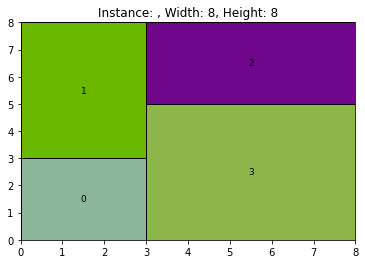

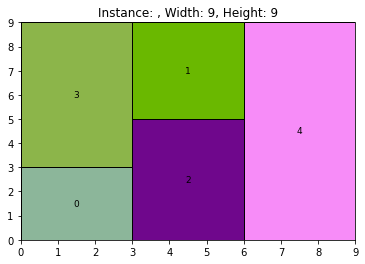

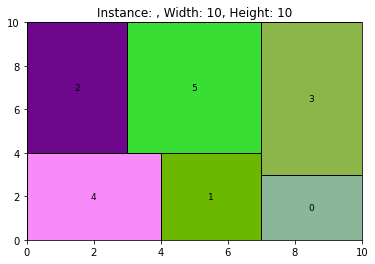

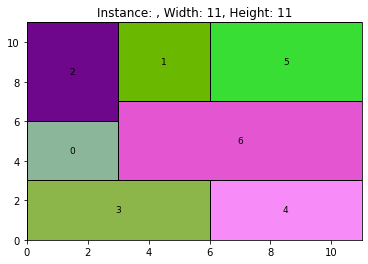

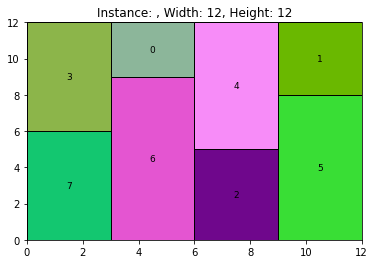

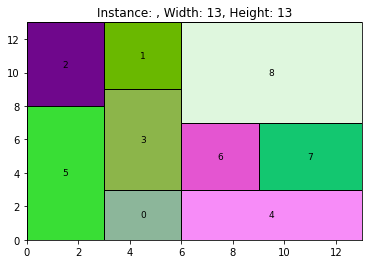

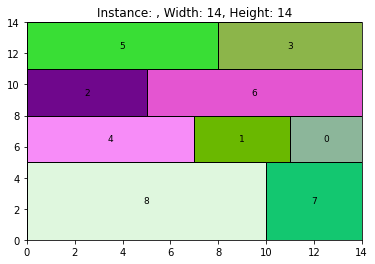

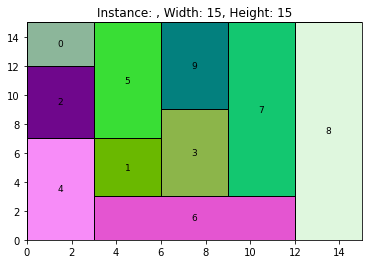

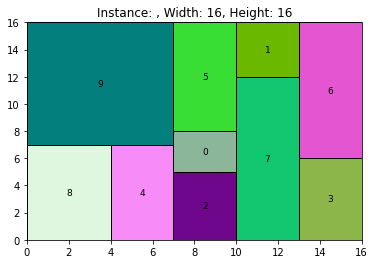

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re
import numpy as np


class Rectangle:
  '''
  Implementation of a Rectangle structure

  x: the x coordinate of the LEFT BOTTOM corner
  y: the y coordinate of the LEFT BOTTOM corner
  width: the width of the rectangles
  height: the weight of the rectangles 
  '''
  def __init__ (self, width, height, x=None, y=None):
    self.x = x
    self.y = y
    self.width = width
    self.height = height
    #self.rotation=rotation

def plot_rectangles(rectangles, title="", indexes=True):
  '''
  This function plots the given input rectangles and computes the placing margins of those
  
  rectangles: the rectangles to be plotted
  title: the title to be assigned to the plot
  indexes: True to plot the indexes of the input rectangles, ordered by list index
'''

  title = re.split("/", title)
  title = title[-1].replace(".txt","")

  fig, ax = plt.subplots()

  max_height = max([rectangles[i].y + rectangles[i].height] for i in range(len(rectangles)))[0]
  max_width = max([rectangles[i].x + rectangles[i].width] for i in range(len(rectangles)))[0]

  for i in range(0,len(rectangles)):
    np.random.seed(i)
    rect_draw = patches.Rectangle( (rectangles[i].x, rectangles[i].y) , rectangles[i].width , rectangles[i].height, facecolor = np.random.rand(3,), edgecolor='k', label="ciao")
    ax.add_patch(rect_draw)

    if indexes:
      cx = rectangles[i].x + rectangles[i].width/2.0
      cy = rectangles[i].y + rectangles[i].height/2.0
      ax.annotate(i, (cx, cy), color='k', 
                  fontsize=9, ha='center', va='center')

  ax.set_title("Instance: {}, Width: {}, Height: {}".format(title, max_width, max_height))
  ax.spines['top'].set_visible(False)
  ax.set_xlim((0, max_width))
  ax.set_ylim((0, max_height))
  #ax.set_aspect('equal')
  ax.autoscale_view(tight=True)
  ax.set_axisbelow(True)
  ax.grid()
  plt.show()



#ploting instance number 36 as an example 
for i in range(1,10):
    instance=i
    file_name = "./../out_test - Copy/out-" + str(instance) + ".txt"
    file_out = open(file_name)
    results= file_out.readlines()

    list =[]

    for coordinates in results[2:]:
        w_h_x_y_r = coordinates.split()
        w_h_x_y_r = [int(x) for x in w_h_x_y_r]
        w= w_h_x_y_r[0]
        h= w_h_x_y_r[1]
        x= w_h_x_y_r[2]
        y= w_h_x_y_r[3]
      #  r= w_h_x_y_r[4]
        
        list.append(Rectangle (w,h,x,y))
        
    

    plot_rectangles(list)

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles_1 = [f for f in listdir(r"./../time_1_all/") if isfile(join("./../time_1_all/", f))]
onlyfiles_1_r = [f for f in listdir(r"./../time_1_r_all/") if isfile(join("./../time_1_r_all/", f))]

'''
onlyfiles_2 = [f for f in listdir("./../time_2_all/") if isfile(join("./../time_2_all/", f))]
onlyfiles_2_r = [f for f in listdir("./../time_2_r_all/") if isfile(join("./../time_2_r_all/", f))]
'''

times_1_all=[]
times_1_r_all=[]
times_2_all=[]
times_2_r_all=[]

for i in range(1,41):
    with open(r"./../time_1_all/time-" + str(i)+".txt") as f:
        lines = f.readlines()
        times_1_all.append(float(lines[0]))


for i in range(1,41):
    with open(r"./../time_1_r_all/time-" + str(i)+".txt") as f:
        lines = f.readlines()
        times_1_r_all.append(float(lines[0]))



for i in range(1,41):
    with open(r"./../time_2_all/time-" + str(i)+".txt") as f:
        lines = f.readlines()
        times_2_all.append(float(lines[0]))
        

for i in range(1,41):
    with open(r"./../time_2_r_all/time-" + str(i)+".txt") as f:
        lines = f.readlines()
        times_2_r_all.append(float(lines[0]))




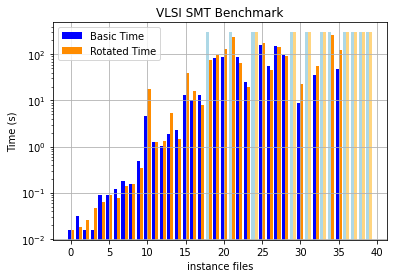

In [130]:
import matplotlib.pyplot as plt
import numpy as np


# make data:

#x = [i for i in range(1,len(times)+1)]
x=np.arange(len(times_1_all))


#N=len(times)

# plot
fig,ax = plt.subplots()

plt.ylabel('Time (s)')
plt.xlabel('instance files')
#plt.bar(x, times_1, width=0.7, edgecolor="white", linewidth=0.7)
#plt.bar(x, times_1_r, width=0.5, edgecolor="red", linewidth=0.7)
color_1=[]
color_1_r=[]
for i,j in zip( times_1_all,times_1_r_all):
    if i<=300:
        color_1.append('#0000FF')
    else:
        color_1.append('#ADD8E6')
    if j<300:
        color_1_r.append('#FF8C00')
    else:
        color_1_r.append('#FFD580')

plt.bar(x -0.2 , times_1_all, 0.4, color= color_1 ,label = 'Basic Time')
plt.bar(x +0.2, times_1_r_all, 0.4,color= color_1_r , label = 'Rotated Time')
plt.yscale("log")
ax.grid(zorder=0)
plt.title("VLSI SMT Benchmark")
plt.legend(loc='best')
plt.savefig('../graphs/basic.png')
plt.show()


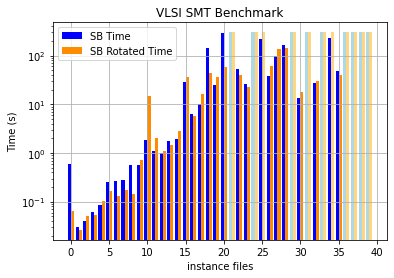

In [131]:


# make data:

#x = [i for i in range(1,len(times)+1)]
x=np.arange(len(times_2_all))



# plot
fig,ax = plt.subplots()

plt.ylabel('Time (s)')
plt.xlabel('instance files')
#plt.bar(x, times_1, width=0.7, edgecolor="white", linewidth=0.7)
#plt.bar(x, times_1_r, width=0.5, edgecolor="red", linewidth=0.7)
color_2=[]
color_2_r=[]
for i,j in zip( times_2_all,times_2_r_all):
    if i<=300:
        color_2.append('#0000FF')
    else:
        color_2.append('#ADD8E6')
    if j<=300:
        color_2_r.append('#FF8C00')
    else:
        color_2_r.append('#FFD580')

plt.bar(x -0.2 , times_2_all, 0.4, color= color_2 ,label = 'SB Time')
plt.bar(x +0.2, times_2_r_all, 0.4,color= color_2_r , label = 'SB Rotated Time')
plt.yscale("log")
ax.grid(zorder=0)
plt.title("VLSI SMT Benchmark")
plt.legend(loc='best')
plt.savefig('../graphs/symmetry.png')
plt.show()

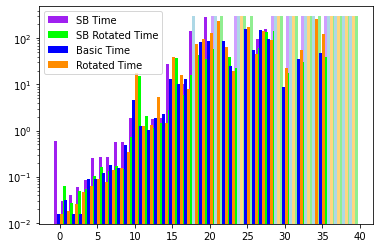

In [106]:
color_2=[]
color_2_r=[]
for i,j in zip( times_2_all,times_2_r_all):
    if i<=300:
        color_2.append('#A020F0')
    else:
        color_2.append('#CF9FFF')
    if j<=300:
        color_2_r.append('#00FF00')
    else:
        color_2_r.append('#90EE90')
plt.bar(x -0.6 , times_2_all, 0.4, color= color_2 ,label = 'SB Time')
plt.bar(x +0.6, times_2_r_all, 0.4,color= color_2_r , label = 'SB Rotated Time')
plt.bar(x -0.2 , times_1_all, 0.4, color= color_1 ,label = 'Basic Time')
plt.bar(x +0.2, times_1_r_all, 0.4,color= color_1_r , label = 'Rotated Time')
plt.yscale("log")
plt.legend(loc='best')
plt.show()

In [ ]:
def plot_SMT_benchmark(instances_to_solve: int = 40, solver_name: str = "gurobi", timeout: int = 300, plot=False):
    """
    Produces the barplot with all the LP solving mechanisms (base, rotations,
    base + symmetry breaking, rotations + symmetry breaking). Also produces a
    file with initial values + final positioning coordinates and total height.
    In the same folder an output with the resulting time statistics is produced.

    """

    times_base = []
    times_base_rotate = []
    times_SB = []
    times_SB_rotate = []

    time_overs_base = []
    time_overs_base_rotate = []
    time_overs_SB = []
    time_overs_SB_rotate = []

    for j in tqdm(range(1, instances_to_solve + 1)):

        # base
        time, time_over = #FIXME smt_benchmark(j, timeout=timeout, method="base", solver_name=solver_name, plot=plot)
        times_base.append(time)

        if time_over:
            time_overs_base.append(j - 1)

        # base + SB
        time, time_over = #FIXME smt_benchmark(j, timeout=timeout, method="base-sb", solver_name=solver_name, plot=plot)
        times_SB.append(time)

        if time_over:
            time_overs_SB.append(j - 1)

        # rotated
        time, time_over = #FIXME smt_benchmark(j, timeout=timeout, method="rotations", solver_name=solver_name, plot=plot)
        times_base_rotate.append(time)

        if time_over:
            time_overs_base_rotate.append(j - 1)

        # rotated + SB
        time, time_over = #FIXME smt_benchmark(j, timeout=timeout, method="rotations-sb", solver_name=solver_name, plot=plot)
        times_SB_rotate.append(time)

        if time_over:
            time_overs_SB_rotate.append(j - 1)

    X = range(1, instances_to_solve + 1)
    X_axis = np.arange(0, len(times_SB) * 2, 2)

    plt.rcParams["figure.figsize"] = (13, 6)
    plt.xticks(X_axis, X)

    # base
    barbase = plt.bar(X_axis - 0.6, times_base, 0.4, label='Base time')

    for j in time_overs_base:
        barbase[j].set_alpha(0.25)

    # base + rotation
    barbaserotation = plt.bar(X_axis - 0.2, times_base_rotate, 0.4, label='Rotated time')

    for j in time_overs_base_rotate:
        barbaserotation[j].set_alpha(0.25)

    # SB
    barSB = plt.bar(X_axis + 0.2, times_SB, 0.4, label='Base SB time')

    for j in time_overs_SB:
        barSB[j].set_alpha(0.25)

    # SB + rotation
    barSBrotation = plt.bar(X_axis + 0.6, times_SB_rotate, 0.4, label='Rotated + SB time')

    for j in time_overs_SB_rotate:
        barSBrotation[j].set_alpha(0.25)

    plt.xlabel("VLSI_Instance files")
    plt.ylabel("Time(s)")
    plt.title("VLSI SMT Benchmark" + "solver: " + solver_name)
    plt.grid()
    plt.axhline(y=timeout, xmin=0, xmax=1, color='r', linestyle='-.', linewidth=2, label=f"time_limit = {timeout} s")
    #plt.yscale("log")
    plt.legend()
    plt.savefig(f'lp_benchmark_{solver_name}.png', transparent=False, format="png")
    plt.show()

    out_text = f"total Base time        -- mean: {np.mean(times_base)} std: {np.std(times_base)}\n"
    out_text += f"total rotated time     -- mean: {np.mean(times_base_rotate)} std: {np.std(times_base_rotate)}\n"
    out_text += f"total SB time          -- mean: {np.mean(times_SB)} std: {np.std(times_SB)}\n"
    out_text += f"total rotated + SB time-- mean: {np.mean(times_SB_rotate)} std: {np.std(times_SB_rotate)}\n"

    print(out_text)
    # write txt log
    with open(f"smt_benchmark_log_{solver_name}.txt", "w") as file:
        content = out_text
        file.writelines(content)
        file.close()


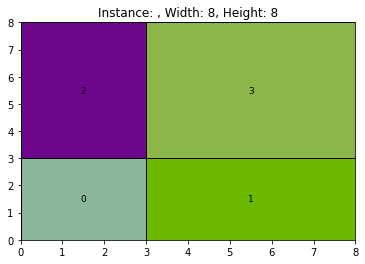

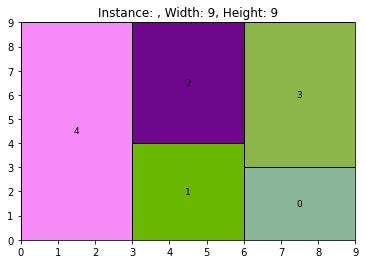

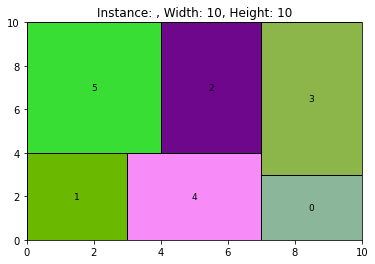

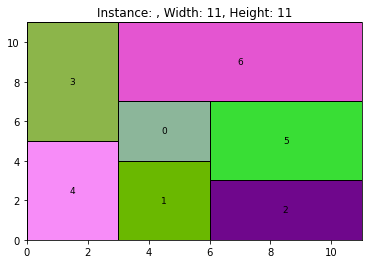

ValueError: invalid literal for int() with base 10: 'True'

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import re
import numpy as np


class Rectangle:
  '''
  Implementation of a Rectangle structure

  x: the x coordinate of the LEFT BOTTOM corner
  y: the y coordinate of the LEFT BOTTOM corner
  width: the width of the rectangles
  height: the weight of the rectangles 
  '''
  def __init__ (self, width, height, x=None, y=None):
    self.x = x
    self.y = y
    self.width = width
    self.height = height
    #self.rotation=rotation

def plot_rectangles(rectangles, title="", indexes=True):
  '''
  This function plots the given input rectangles and computes the placing margins of those
  
  rectangles: the rectangles to be plotted
  title: the title to be assigned to the plot
  indexes: True to plot the indexes of the input rectangles, ordered by list index
'''

  title = re.split("/", title)
  title = title[-1].replace(".txt","")

  fig, ax = plt.subplots()

  max_height = max([rectangles[i].y + rectangles[i].height] for i in range(len(rectangles)))[0]
  max_width = max([rectangles[i].x + rectangles[i].width] for i in range(len(rectangles)))[0]

  for i in range(0,len(rectangles)):
    np.random.seed(i)
    rect_draw = patches.Rectangle( (rectangles[i].x, rectangles[i].y) , rectangles[i].width , rectangles[i].height, facecolor = np.random.rand(3,), edgecolor='k', label="ciao")
    ax.add_patch(rect_draw)

    if indexes:
      cx = rectangles[i].x + rectangles[i].width/2.0
      cy = rectangles[i].y + rectangles[i].height/2.0
      ax.annotate(i, (cx, cy), color='k', 
                  fontsize=9, ha='center', va='center')

  ax.set_title("Instance: {}, Width: {}, Height: {}".format(title, max_width, max_height))
  ax.spines['top'].set_visible(False)
  ax.set_xlim((0, max_width))
  ax.set_ylim((0, max_height))
  #ax.set_aspect('equal')
  ax.autoscale_view(tight=True)
  ax.set_axisbelow(True)
  ax.grid()
  plt.show()



#ploting instance number 36 as an example 
for i in range(1,10):
    instance=i
    file_name = "./../out_test/out-" + str(instance) + ".txt"
    file_out = open(file_name)
    results= file_out.readlines()

    list =[]

    for coordinates in results[2:]:
        w_h_x_y_r = coordinates.split()
        w_h_x_y_r = [int(x) for x in w_h_x_y_r]
        w= w_h_x_y_r[0]
        h= w_h_x_y_r[1]
        x= w_h_x_y_r[2]
        y= w_h_x_y_r[3]
      #  r= w_h_x_y_r[4]
        
        list.append(Rectangle (w,h,x,y))
        
    

    plot_rectangles(list)

In [ ]:
    circuits_y = [Int(f"y_{i}") for i in range(13)]
    print(circuits_y)

In [ ]:
i